In [178]:
from sklearn import ensemble
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import sklearn
from matplotlib import pyplot as plt
import itertools
% matplotlib inline
from sklearn.utils.class_weight import compute_sample_weight

In [119]:
data_train = np.load('../data/train_data.npy')
data_val = np.load('../data/val_data.npy')
label_train = np.load('../data/train_label.npy')
label_val = np.load('../data/val_label.npy')

In [120]:
pca = PCA(n_components=100, whiten=False).fit(data_train)

In [121]:
print(sum(pca.explained_variance_ratio_))

0.323036750059


In [122]:
X = pca.transform(data_train)
y = label_train.astype(np.int)

In [147]:
weights = compute_sample_weight(class_weight='balanced', y=label_train)

In [180]:
cls = SVC()
# cls = ensemble.GradientBoostingClassifier()

In [181]:
cls.fit(X, y, sample_weight=weights)
#cls.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [182]:
pred = cls.predict(X)

In [183]:
sklearn.metrics.accuracy_score(y, pred)

0.90708783662745562

In [184]:
X_v = pca.transform(data_val)
y_v = label_val.astype(np.int)

In [185]:
pred_v = cls.predict(X_v)

In [186]:
conf = sklearn.metrics.confusion_matrix(y_v, pred_v)

In [187]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [188]:
sklearn.metrics.accuracy_score(y_v, pred_v)

0.28737613097802672

In [189]:
print(sklearn.metrics.classification_report(y_v, pred_v))

             precision    recall  f1-score   support

          0       1.00      0.18      0.30        39
          1       1.00      0.03      0.06        96
          2       0.84      0.94      0.89       207
          3       0.01      0.75      0.03        16
          4       0.14      1.00      0.24        10
          5       0.14      0.93      0.24        15
          6       1.00      1.00      1.00         3
          7       0.00      0.00      0.00         8
          8       0.00      0.00      0.00         6
          9       0.65      0.88      0.75        83
         10       0.68      0.40      0.50        67
         11       0.75      0.63      0.69        71
         12       0.00      0.00      0.00         9
         13       0.00      0.00      0.00        49
         14       0.00      0.00      0.00      1006
         15       1.00      1.00      1.00        16
         16       0.00      0.00      0.00       423
         17       0.94      1.00      0.97   

Confusion matrix, without normalization
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


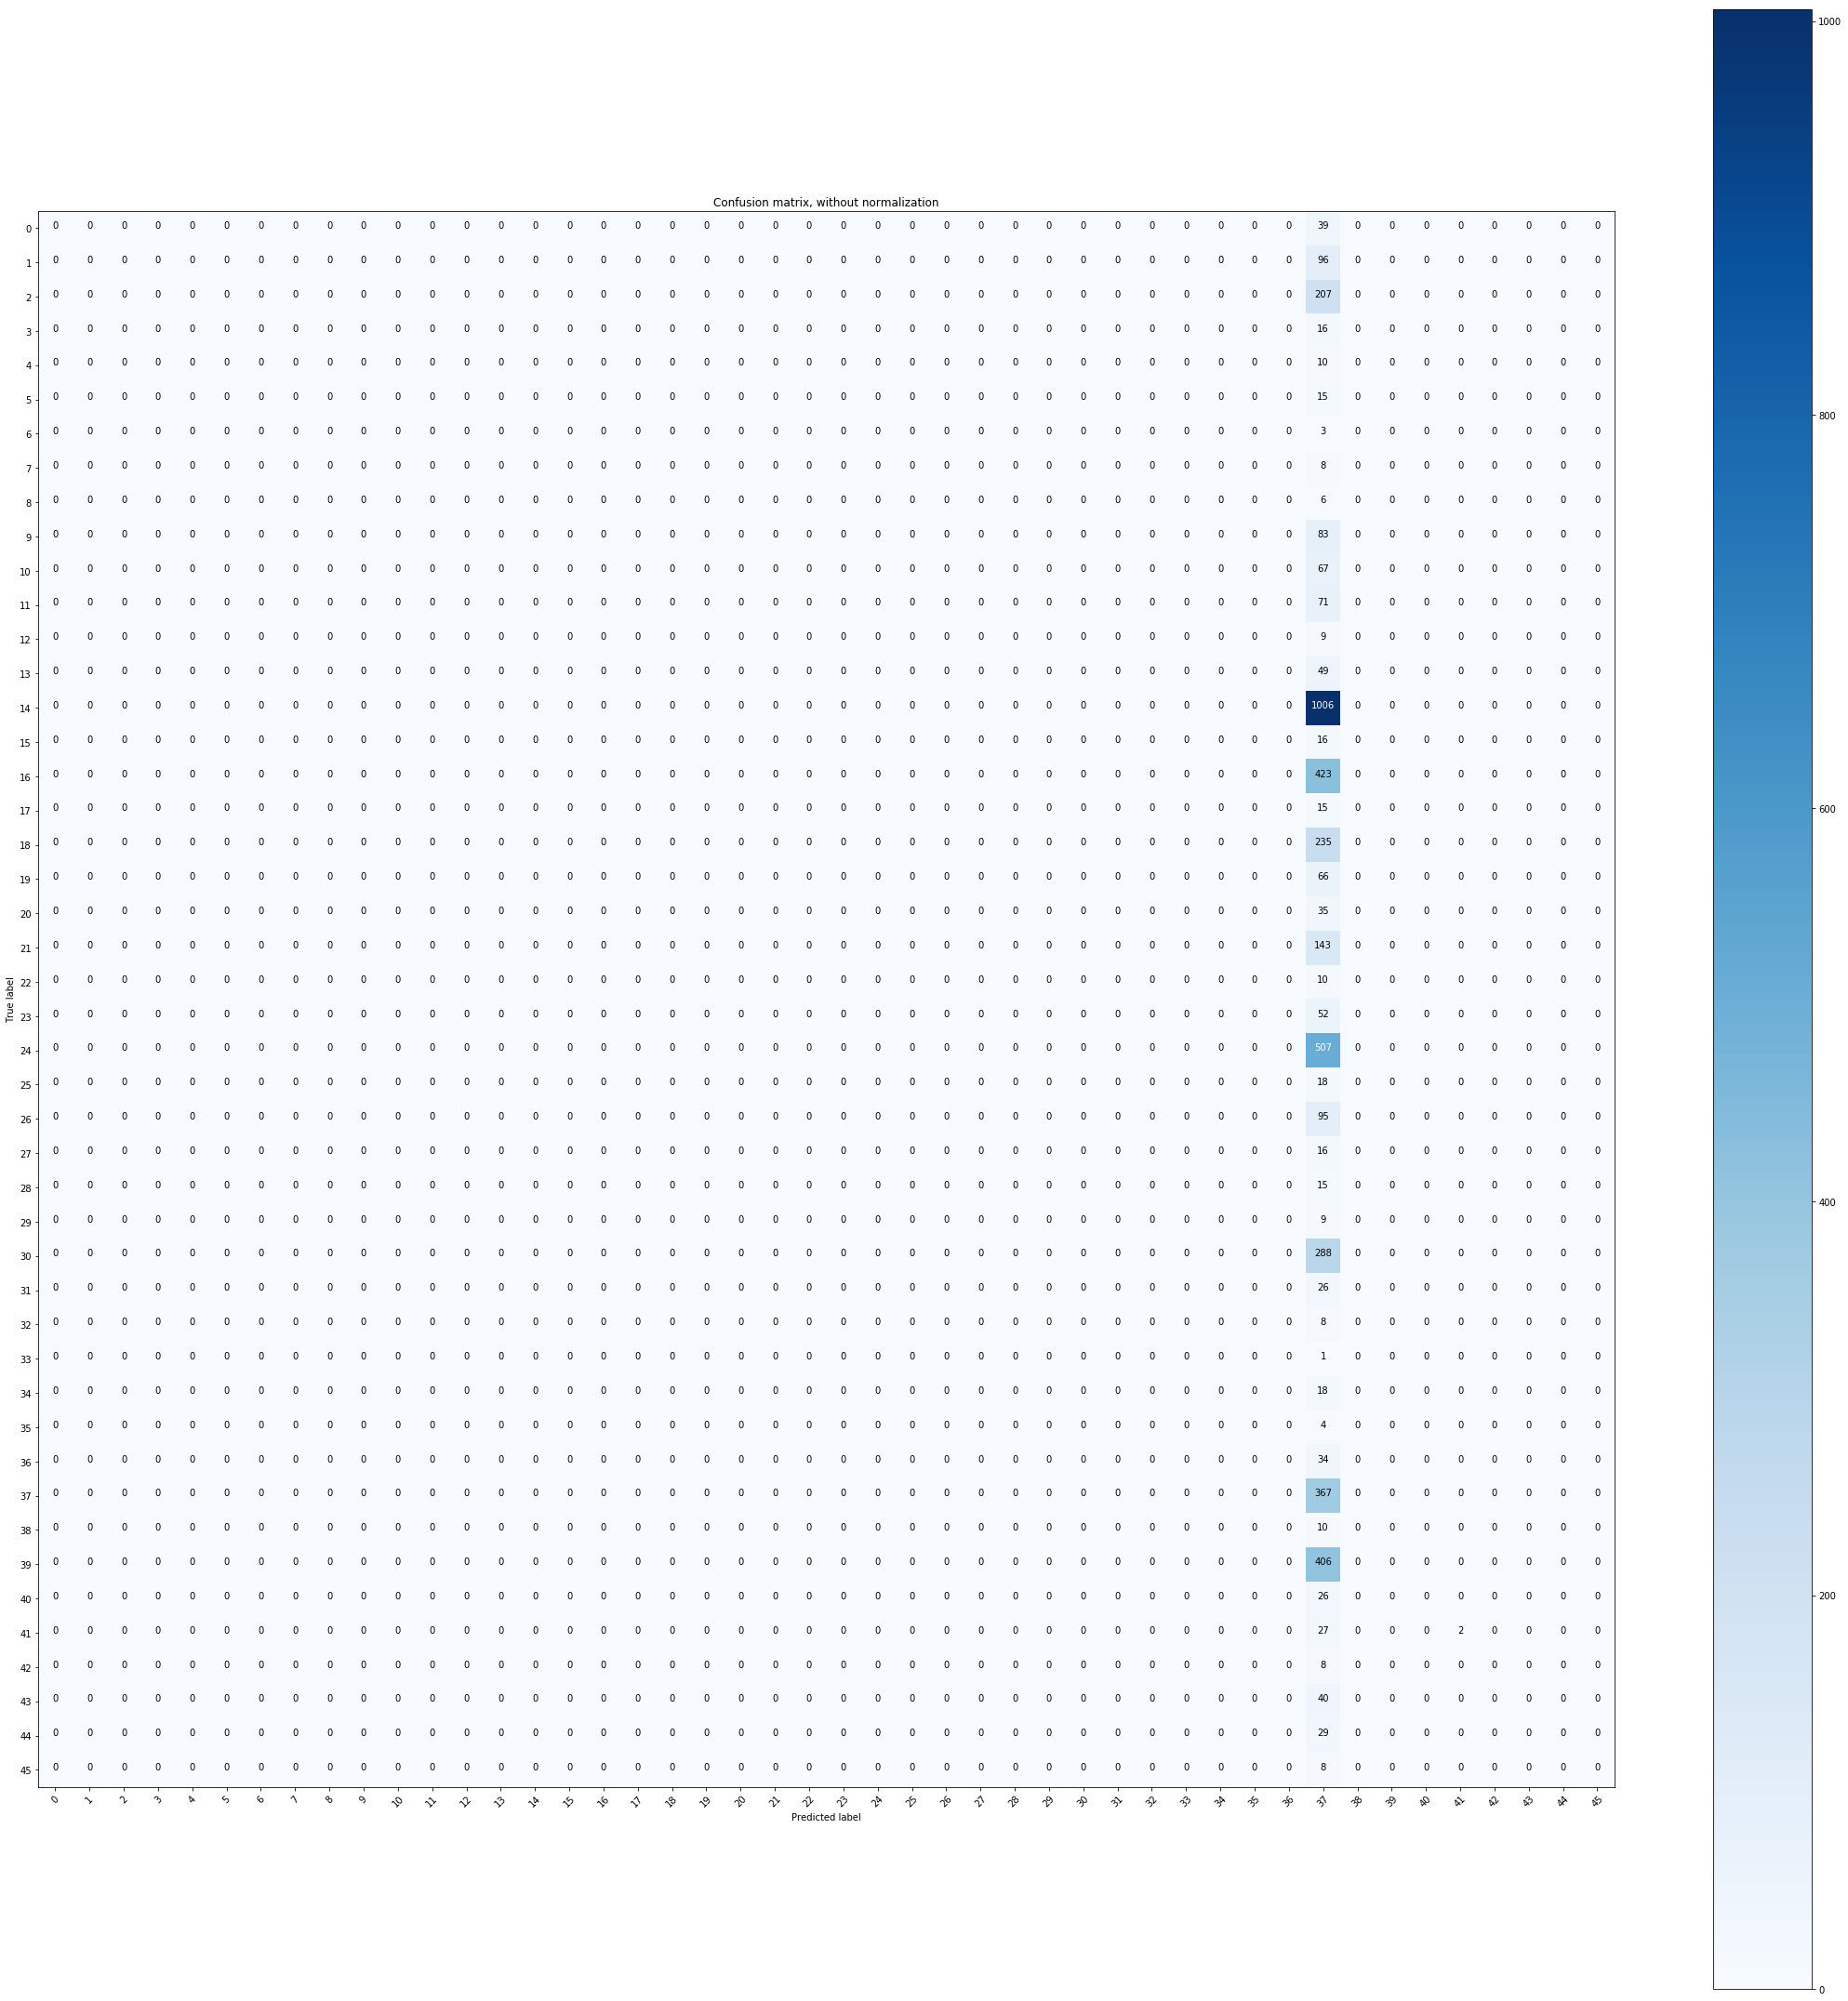

In [116]:

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(30,30))
plot_confusion_matrix(conf, classes=range(46),
                      title='Confusion matrix, without normalization')
plt.show()